<a href="https://colab.research.google.com/github/bishoppython/Analise-de-Dados---Data-Analytics/blob/main/Recomendador_de_Animes_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inicialmente instalaremos as Library no notebook

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

*Em seguida vamos importá-las*

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

#Dataset Utilizado extraído do Kaggle
https://www.kaggle.com/CooperUnion/anime-recommendations-database

`*Em sequencia ler os arquivos*`

as Bibliotecas Matplotlib e Seaborn serão utilizadas apenas para validação e observação do comportamento da distribuição em si, não sendo requisitos necessários para o "recomendados"

In [5]:
df_anime = pd.read_csv('anime.csv')
df_notas = pd.read_csv('rating.csv')

Em seguida vamos analisar os dois data frames juntos e usaremos o display para visualizar

In [ ]:
display(df_anime.head())
df_notas.head()

Abaixo mais algumas informações dos Dataframes

In [ ]:
display(df_anime.info())
print('=='*40)
display(df_notas.info())

Uniremos agora os dois dataframes em um só, utilizando a coluna 'anime_id' e escluindo o 'rating' do df_anime, afinal o que nos interessa é a nota dada pelo usuário, ou seja, o 'user_id'

In [ ]:
df = pd.merge(df_notas, df_anime.drop('rating', axis=1),on='anime_id' )
print(df.shape)
df.head()

Como podemos observar, o mesmo anime aparece diversas vezes, pois diversos usuários deram uma nota para ele. Então faremos um agrupamento dos animes pelo nome, e pegaremos a contagem das avaliações. Com isso, teremos os animes com mais avaliações (não as maiores avaliações, mas aqueles com mais QUANTIDADE DE VOTOS, sejam eles altos ou baixos).
Depois de pegar esses animes, apenas os colocaremos em ordem descrescente, colocando depois do código um ‘.sort_values(ascending=False)’

In [10]:
df.groupby('name')['rating'].count().sort_values(ascending=False).head(600)

name
Death Note                                                       15997
Sword Art Online                                                 12674
Shingeki no Kyojin                                               12060
Angel Beats!                                                     11598
Code Geass: Hangyaku no Lelouch                                  11350
                                                                 ...  
Mahou Shoujo Madoka★Magica Movie 1: Hajimari no Monogatari        1448
Sekaiichi Hatsukoi 2                                              1444
Hakuouki                                                          1442
Dragon Ball Z Movie 02: Kono Yo de Ichiban Tsuyoi Yatsu           1437
Chuunibyou demo Koi ga Shitai!: Kirameki no... Slapstick Noel     1435
Name: rating, Length: 600, dtype: int64

Foi exibido 600 animes agrupados pelo nome, contudo, mostrou-se apenas os 5 primeiros e os 5 ultimos.

Depois disso, criaremos um dataframe para a média das notas: Criar o dataframe Criar uma coluna com os números de avaliações (as quantidades) e depois com a avaliação média

In [11]:
notas = pd.DataFrame(df.groupby('name')['rating'].mean())
notas['numero de avaliações'] = pd.DataFrame(df.groupby('name')['rating'].count())
notas['avaliação média'] = pd.DataFrame(df.groupby('name')['rating'].mean().round(2))
notas

,rating,numero de avaliações,avaliação média
name,,,
&quot;0&quot;,2.666667,9,2.67
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,5.917379,351,5.92
&quot;Bungaku Shoujo&quot; Memoire,6.104839,372,6.10
&quot;Bungaku Shoujo&quot; Movie,6.409496,674,6.41
&quot;Eiji&quot;,6.428571,7,6.43
...,...,...,...
xxxHOLiC Kei,6.791787,1388,6.79
xxxHOLiC Movie: Manatsu no Yoru no Yume,6.296774,930,6.30
xxxHOLiC Rou,6.661585,656,6.66


`Nota + Número de Avaliações + Avaliação Média`

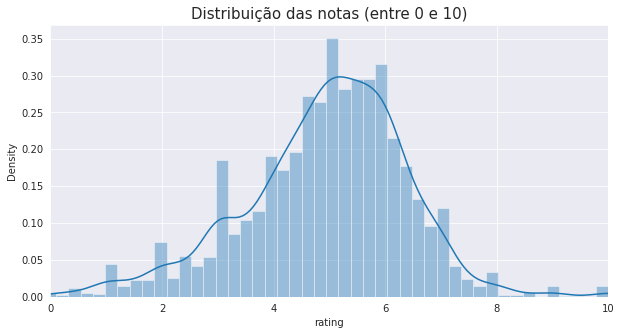

In [12]:
fig = plt.figure(figsize=(10,5))
sns.distplot(notas['rating'])
plt.xlim(0,10)
plt.title('Distribuição das notas (entre 0 e 10)', fontsize=15);

Agora criar um novo dataframe para os generos, usando o nome e o genero dos animes no df_anime original, Depois colocar o nome do anime como indice do dataframe do genero

In [13]:
genero = pd.DataFrame(data=df_anime[['name','genre']])
genero.set_index('name', inplace=True)
genero

,genre
name,
Kimi no Na wa.,"Drama, Romance, School, Supernatural"
Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
Gintama°,"Action, Comedy, Historical, Parody, Samurai, S..."
Steins;Gate,"Sci-Fi, Thriller"
Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S..."
...,...
Toushindai My Lover: Minami tai Mecha-Minami,Hentai
Under World,Hentai
Violence Gekiga David no Hoshi,Hentai


Agora que nossos dados já estão organizados, é hora de criar o sistema de recomendação
O primeiro passo é criar uma função para verificar o genero do anime, essa função será usado dentro do nosso sistema

In [15]:
def verificar_genero(lista_genero, string): #Definir a função, as variaveis são a lista de genero e uma string
  if any(x in string for x in lista_genero): #Se existir um x nessa string que está dentro da lista de generos
    return True #Vai retornar True
  else: #Se não
    return False #Vai retornar False

Depois da função que verifica o gênero, criamos o sistema de recomendação

In [21]:
#Definir a função para recomendar o anime, usando como variável o nome do anime e o número n de animes que será recomendado
def recomendar_anime(nome_do_anime, n):
#Localizar o anime escolhido dentro do dataframe genero que criamos lá em cima, depois pegar os valores contidos nessa série e splitar
    genero_anime = genero.loc[nome_do_anime].values[0].split(', ')
#Colocar o nome dos animes do mesmo gênero que o escolhido e colocar numa lista
    cols = df_anime[df_anime['genre'].apply(lambda x: verificar_genero(genero_anime, str(x)))]['name'].tolist()
#Pegar o nome dos animes que foram selecionados e fazer uma pivot_table com o df (que foi unido lá em cima) e a nota que cada usuário deu pra esse anime
    matriz_de_animes = df[df['name'].isin(cols)].pivot_table(index='user_id', columns='name', values='rating')
#Verificar a nota de cada usuário para aquele anime selecionado
    anime_nota = matriz_de_animes[nome_do_anime]
#Fazer a correlação entre os nomes dos animes e suas notas
    anime_parecido = matriz_de_animes.corrwith(anime_nota)
#Criar um dataframe com essa correlação e colocar numa coluna 'correlação'
    anime_correlacionado = pd.DataFrame(anime_parecido, columns=['correlação'])
#Pegar o dataframe de notas que criamos lá em cima e selecionar as    colunas de numero de avaliações e avaliação média
    anime_correlacionado = anime_correlacionado.join(notas[['numero de avaliações', 'avaliação média']])
#Excluir os dados nulos
    anime_correlacionado.dropna(inplace=True)
#Selecionar apenas os animes com número de avaliação maior que 5 mil, colocá-los em ordem descrescente
    animes_recomendados = anime_correlacionado[anime_correlacionado['numero de avaliações'] > 3000].sort_values('correlação', ascending=False)
#Criar nosso dataframe final, que vai ser a tabela dos animes recomendados
    animes_recomendados= animes_recomendados.rename_axis('Animes recomendados')
    print(f'Anime escolhido: {nome_do_anime}')
    return animes_recomendados.head(n+1)

In [28]:
genero_anime = genero.loc['Death Note'].values[0].split(', ')
genero_anime

['Mystery', 'Police', 'Psychological', 'Supernatural', 'Thriller']

Aqui pegamos essa lista e verificamos quais os animes pertencem aos mesmos gêneros (não necessariamente TODOS os gêneros, mas pelo menos um), e jogamo-os dentre de uma lista

In [29]:
cols = df_anime[df_anime['genre'].apply(lambda x: verificar_genero(genero_anime, str(x)))]['name'].tolist()
cols

['Kimi no Na wa.',
 'Steins;Gate',
 'Clannad: After Story',
 'Sen to Chihiro no Kamikakushi',
 'Mushishi Zoku Shou 2nd Season',
 'One Punch Man',
 'Suzumiya Haruhi no Shoushitsu',
 'Monogatari Series: Second Season',
 'Mushishi Zoku Shou',
 'Mushishi',
 'Natsume Yuujinchou Go',
 'Mushishi Zoku Shou: Suzu no Shizuku',
 'Natsume Yuujinchou Shi',
 'Fate/Zero 2nd Season',
 'Kizumonogatari II: Nekketsu-hen',
 'Monster',
 'Death Note',
 'Kara no Kyoukai 5: Mujun Rasen',
 'Natsume Yuujinchou San',
 'Ping Pong The Animation',
 'Mushishi Special: Hihamukage',
 'Boku dake ga Inai Machi',
 'Yojouhan Shinwa Taikei',
 'Kamisama Hajimemashita: Kako-hen',
 'Rainbow: Nisha Rokubou no Shichinin',
 'Re:Zero kara Hajimeru Isekai Seikatsu',
 'Zoku Natsume Yuujinchou',
 'Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.',
 'Steins;Gate Movie: Fuka Ryouiki no Déjà vu',
 'Hotarubi no Mori e',
 'JoJo no Kimyou na Bouken: Stardust Crusaders 2nd Season',
 'Hellsing Ultimate',
 'Kiseijuu: Sei no Kakuritsu

Agora criamos uma matriz (um dataframe é uma matriz) com esses animes como colunas e os usuários como indice, preenchendo os valores com as notas dadas por cada usuário

In [27]:
matriz_de_animes = df[df['name'].isin(cols)].pivot_table(index='user_id', columns='name', values='rating')
matriz_de_animes

name,&quot;Bungaku Shoujo&quot; Movie,.hack//Intermezzo,.hack//Liminality,.hack//Sign,.hack//The Movie: Sekai no Mukou ni,11-nin Iru!,11eyes,11eyes: Momoiro Genmutan,A Kite,AD Police,...,Zombie-Loan Specials,Zonmi-chan: Meat Pie of the Dead,ef: A Tale of Melodies.,ef: A Tale of Memories.,ef: A Tale of Memories. - Recollections,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,-1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29602,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,7.0,7.0,NaN,8.0,7.0,8.0,NaN,NaN
29603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29604,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN


Agora selecionamos o anime que escolhemos

In [30]:
anime_nota = matriz_de_animes['Death Note']
anime_nota

user_id
1         NaN
2         NaN
3        10.0
4        -1.0
5         4.0
         ... 
29602     8.0
29603     NaN
29604     9.0
29605     9.0
29606     6.0
Name: Death Note, Length: 28262, dtype: float64

E veremos os animes parecidos, e faremos isso usando .corrwith
Isso nos trará o seguinte: a correlação entre a nota dos usuários para todos os animes e a nota dos usuários para AQUELE anime em específico (neste contexto o Death Note)

In [31]:
anime_parecido = matriz_de_animes.corrwith(anime_nota)
anime_parecido

name
&quot;Bungaku Shoujo&quot; Movie           0.588788
.hack//Intermezzo                          0.517880
.hack//Liminality                          0.611530
.hack//Sign                                0.627541
.hack//The Movie: Sekai no Mukou ni        0.553926
                                             ...   
xxxHOLiC                                   0.642402
xxxHOLiC Kei                               0.609062
xxxHOLiC Movie: Manatsu no Yoru no Yume    0.613248
xxxHOLiC Rou                               0.584250
xxxHOLiC Shunmuki                          0.582176
Length: 1449, dtype: float64

Agora criamos um dataframe com esses animes parecidos com Death Note, usando “correlação” como coluna

In [32]:
anime_correlacionado = pd.DataFrame(anime_parecido, columns=['correlação'])
anime_correlacionado

,correlação
name,
&quot;Bungaku Shoujo&quot; Movie,0.588788
.hack//Intermezzo,0.517880
.hack//Liminality,0.611530
.hack//Sign,0.627541
.hack//The Movie: Sekai no Mukou ni,0.553926
...,...
xxxHOLiC,0.642402
xxxHOLiC Kei,0.609062
xxxHOLiC Movie: Manatsu no Yoru no Yume,0.613248


In [43]:
anime_correlacionado = anime_correlacionado.join(notas[['numero de avaliações', 'avaliação média']])

Agora colocaremos mais duas colunas: número de avaliações e avaliação média

In [44]:
anime_correlacionado.dropna(inplace=True)
anime_correlacionado

,correlação,numero de avaliações,avaliação média
name,,,
&quot;Bungaku Shoujo&quot; Movie,0.588788,674,6.41
.hack//Intermezzo,0.517880,349,4.84
.hack//Liminality,0.611530,484,5.09
.hack//Sign,0.627541,1697,5.83
.hack//The Movie: Sekai no Mukou ni,0.553926,189,5.42
...,...,...,...
xxxHOLiC,0.642402,2232,6.62
xxxHOLiC Kei,0.609062,1388,6.79
xxxHOLiC Movie: Manatsu no Yoru no Yume,0.613248,930,6.30


Depois excluímos os dados nulos e colocamos em ordem decrescente de correlação, para que os animes mais correlacionados apareçam no topo, e utilizaremos apenas animes com mais de 4 mil votos, pois animes com poucas avaliações possuem dados insuficientes (usei 4 mil porque é basicamente 10% do anime com maior votos)

In [45]:
anime_correlacionado.dropna(inplace=True)

In [48]:
animes_recomendados = anime_correlacionado[anime_correlacionado['numero de avaliações'] > 4000].sort_values('correlação', ascending=False)
animes_recomendados

,correlação,numero de avaliações,avaliação média
name,,,
Death Note,1.000000,15997,7.54
Darker than Black: Kuro no Keiyakusha,0.712729,6449,6.96
Claymore,0.703020,4890,6.78
Kuroshitsuji,0.701994,6623,6.70
Elfen Lied,0.700392,11185,6.73
Soul Eater,0.698781,8283,6.83
Higurashi no Naku Koro ni,0.695405,5351,7.02
Suzumiya Haruhi no Yuuutsu,0.694613,7637,6.77
Clannad: After Story,0.690890,7560,7.86


Agora chamamos o índice “name” de “Animes recomendados”

In [50]:
animes_recomendados= animes_recomendados.rename_axis('Animes recomendados')
animes_recomendados

,correlação,numero de avaliações,avaliação média
Animes recomendados,,,
Death Note,1.000000,15997,7.54
Darker than Black: Kuro no Keiyakusha,0.712729,6449,6.96
Claymore,0.703020,4890,6.78
Kuroshitsuji,0.701994,6623,6.70
Elfen Lied,0.700392,11185,6.73
Soul Eater,0.698781,8283,6.83
Higurashi no Naku Koro ni,0.695405,5351,7.02
Suzumiya Haruhi no Yuuutsu,0.694613,7637,6.77
Clannad: After Story,0.690890,7560,7.86


testando animes

In [51]:
recomendar_anime('Death Note', 5)

Anime escolhido: Death Note


,correlação,numero de avaliações,avaliação média
Animes recomendados,,,
Death Note,1.000000,15997,7.54
Pandora Hearts,0.716446,3192,6.44
Darker than Black: Kuro no Keiyakusha,0.712729,6449,6.96
Higurashi no Naku Koro ni Kai,0.705807,3823,7.08
Claymore,0.703020,4890,6.78
Kuroshitsuji,0.701994,6623,6.70


In [52]:
recomendar_anime('Sword Art Online',5)

Anime escolhido: Sword Art Online


,correlação,numero de avaliações,avaliação média
Animes recomendados,,,
Sword Art Online,1.000000,12674,6.86
Accel World,0.748486,4638,6.42
Mirai Nikki (TV),0.726222,9130,6.94
Zero no Tsukaima F,0.725499,3102,6.13
Date A Live,0.717220,4317,6.15
Guilty Crown,0.716624,6259,6.64


In [53]:
recomendar_anime('Shingeki no Kyojin',5)

Anime escolhido: Shingeki no Kyojin


,correlação,numero de avaliações,avaliação média
Animes recomendados,,,
Shingeki no Kyojin,1.000000,12060,7.33
Blood Lad,0.739583,3661,6.11
Sankarea,0.731941,3803,6.03
Sakurasou no Pet na Kanojo,0.729437,4948,7.10
Kuroko no Basket,0.729112,4820,7.01
Hataraku Maou-sama!,0.723613,6010,6.64


In [54]:
recomendar_anime('Code Geass: Hangyaku no Lelouch',5)

Anime escolhido: Code Geass: Hangyaku no Lelouch


,correlação,numero de avaliações,avaliação média
Animes recomendados,,,
Code Geass: Hangyaku no Lelouch,1.000000,11350,7.66
Code Geass: Hangyaku no Lelouch R2,0.904344,10084,7.80
Darker than Black: Kuro no Keiyakusha,0.717844,6449,6.96
Special A,0.704248,3052,6.28
Fate/Zero 2nd Season,0.696011,5062,7.46
Clannad,0.694654,9091,7.20


In [55]:
recomendar_anime('Elfen Lied',5)

Anime escolhido: Elfen Lied


,correlação,numero de avaliações,avaliação média
Animes recomendados,,,
Elfen Lied,1.000000,11185,6.73
Rosario to Vampire Capu2,0.731568,4330,5.91
Love Hina,0.729020,3104,5.89
Fate/stay night,0.723223,6028,6.44
Chobits,0.722837,4963,6.26
Rosario to Vampire,0.720109,5723,5.89


In [56]:
recomendar_anime('Naruto',5)

Anime escolhido: Naruto


,correlação,numero de avaliações,avaliação média
Animes recomendados,,,
Naruto,1.000000,10561,6.53
Bleach,0.709100,5423,6.91
Pandora Hearts,0.703349,3192,6.44
Shakugan no Shana,0.702107,4822,6.44
Shakugan no Shana II (Second),0.700893,3568,6.42
Working!!,0.699676,3012,6.49


In [58]:
recomendar_anime('Dragon Ball',5)

Anime escolhido: Dragon Ball


,correlação,numero de avaliações,avaliação média
Animes recomendados,,,
Dragon Ball,1.000000,5804,6.70
Dragon Ball Z,0.867789,6913,6.85
Dragon Ball GT,0.817612,4559,5.53
Digimon Adventure,0.739172,3843,6.11
Love Hina,0.709680,3104,5.89
Pandora Hearts,0.707705,3192,6.44


In [60]:
recomendar_anime('Fullmetal Alchemist',5)

Anime escolhido: Fullmetal Alchemist


,correlação,numero de avaliações,avaliação média
Animes recomendados,,,
Fullmetal Alchemist,1.000000,10145,7.04
Fullmetal Alchemist: The Conqueror of Shamballa,0.785672,4410,6.32
Fullmetal Alchemist: Brotherhood,0.759679,10222,8.01
Full Metal Panic! The Second Raid,0.740702,3228,6.62
Trigun,0.734346,4413,6.94
Samurai Champloo,0.732131,5637,7.22


In [63]:
recomendar_anime('Saint Seiya',5)

Anime escolhido: Saint Seiya


,correlação,numero de avaliações,avaliação média
Animes recomendados,,,
Devil May Cry,0.785172,3363,5.90
Claymore,0.779037,4890,6.78
Dragon Ball,0.774744,5804,6.70
Kami nomi zo Shiru Sekai II,0.771215,4136,6.76
Trigun,0.762157,4413,6.94
Kami nomi zo Shiru Sekai,0.759148,5239,6.62
